In [17]:
import sys
sys.path.append('../') 

import tkinter as tk
import matplotlib.pyplot as plt
from Test.Sin_Cos.comparesignals import SignalSamplesAreEqual
from Utils.read_signal_file import seperate_file_date
from Utils.plot_graph import plot_data
from Utils.generate_signals import generate_sin_signal, generate_cos_signal
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [18]:
root = tk.Tk()

root.title("DSP Package")
# root.geometry("1200x800")


label = tk.Label(root, text="Signals Representation", font=("Times New Roman", 25))
label.pack(padx=15, pady=5)


In [19]:
data, signal_type, is_periodic, n_samples = seperate_file_date("Signals\signal1.txt")

In [20]:
# Extract x and y values from data
x = [point[0] for point in data]
y = [point[1] for point in data]


In [21]:
signals_representation_frame = tk.Frame(root)
signals_representation_frame.pack(padx=15, pady=5)

continous_signal_representation_frame = tk.Frame(signals_representation_frame)
continous_signal_representation_frame.pack(padx=30, pady=2, side=tk.LEFT, expand=True, fill=tk.BOTH)

discrete_signal_representation_frame = tk.Frame(signals_representation_frame)
discrete_signal_representation_frame.pack(padx=30, pady=2, side=tk.LEFT, expand=True, fill=tk.BOTH)


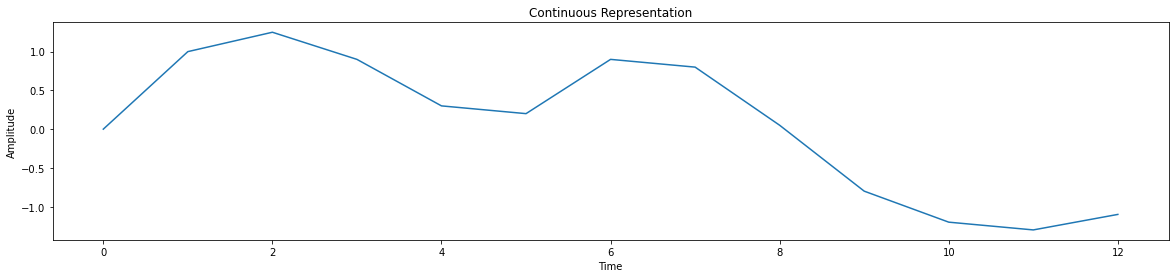

In [22]:
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, continous_signal_representation_frame)
canvas.get_tk_widget().pack()


plot_data(x=x, y=y, plot_type="continuous", title="Continuous Representation", x_label="Time", y_label="Amplitude", ax=ax, canvas=canvas)

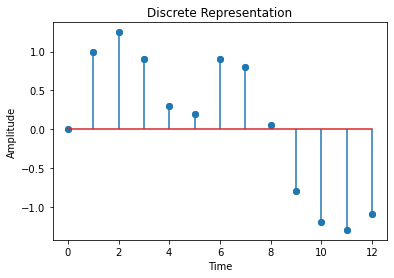

In [23]:
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, discrete_signal_representation_frame)
canvas.get_tk_widget().pack()

plot_data(x=x, y=y, plot_type="discrete", title="Discrete Representation", x_label="Time", y_label="Amplitude", ax=ax, canvas=canvas)

In [24]:
def validate_num(P):
    if P == "" or P == "-":
        return True

    try:
        float(P)
        return True
    except ValueError:
        return False

validate_func = root.register(validate_num)

In [25]:
label = tk.Label(root, text="Signals Generation", font=("Times New Roman", 25))
label.pack()

In [26]:
radio_button_frame= tk.Frame(root)
radio_button_frame.pack()

selected_option = tk.IntVar()

sinusoidal_signal_button = tk.Radiobutton(radio_button_frame, text="Generate Sinusoidal Signal", font=("Times New Roman", 18), variable=selected_option, value=1)
sinusoidal_signal_button.grid(row=0, column=0, padx=15)
cosinusoidal_signal_button = tk.Radiobutton(radio_button_frame, text="Generate Cosinusoidal Signal", font=("Times New Roman", 18), variable=selected_option, value=2)
cosinusoidal_signal_button.grid(row=0, column=1, padx=15)

def get_selected_option():
    selected = selected_option.get()
    print("Selected option:", selected)
    return selected



In [27]:
data_frame= tk.Frame(root)
data_frame.pack(padx=10, side=tk.LEFT)


amplitude_label = tk.Label(data_frame, text="Amplitude", font=("Times New Roman", 18))
amplitude_label.grid(row=0, column=0, sticky=tk.W+tk.E, padx=15)
amplitude_textbox = tk.Entry(data_frame, font=("Times New Roman", 15), width=25, validate="key", validatecommand=(validate_func, "%P"))
amplitude_textbox.grid(row=1, column=0, sticky=tk.W+tk.E, padx=15)


phase_shift_label = tk.Label(data_frame, text="Phase Shift", font=("Times New Roman", 18))
phase_shift_label.grid(row=2, column=0, sticky=tk.W+tk.E, padx=15)
phase_shift_textbox = tk.Entry(data_frame, font=("Times New Roman", 15), width=25, validate="key", validatecommand=(validate_func, "%P"))
phase_shift_textbox.grid(row=3, column=0, sticky=tk.W+tk.E, padx=15)


analog_frequency_label = tk.Label(data_frame, text="Analog Frequency", font=("Times New Roman", 18))
analog_frequency_label.grid(row=4, column=0, sticky=tk.W+tk.E, padx=15)
analog_frequency_textbox = tk.Entry(data_frame, font=("Times New Roman", 15), width=25, validate="key", validatecommand=(validate_func, "%P"))
analog_frequency_textbox.grid(row=5, column=0, sticky=tk.W+tk.E, padx=15)


sampling_frequency_label = tk.Label(data_frame, text="Sampling Frequency", font=("Times New Roman", 18))
sampling_frequency_label.grid(row=6, column=0, sticky=tk.W+tk.E, padx=15)
sampling_frequency_textbox = tk.Entry(data_frame, font=("Times New Roman", 15), width=25, validate="key", validatecommand=(validate_func, "%P"))
sampling_frequency_textbox.grid(row=7, column=0, sticky=tk.W+tk.E, padx=15)


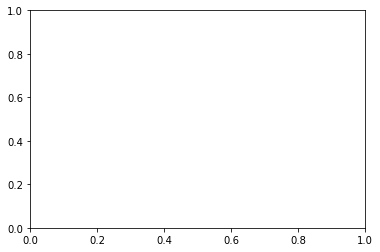

In [28]:
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, root)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True, padx=15, pady=5)


In [29]:
def get_values():
    try:
        amplitude = float(amplitude_textbox.get())
        phase_shift = float(phase_shift_textbox.get())
        analog_frequency = float(analog_frequency_textbox.get())
        sampling_frequency = float(sampling_frequency_textbox.get())
        print(amplitude, phase_shift, analog_frequency, sampling_frequency)
    except Exception as e:
        tk.messagebox.showerror("Error", f"All values must be filled.")
        return
        
    return amplitude, phase_shift, analog_frequency, sampling_frequency 

In [30]:
def generate_signals():

    amplitude, phase_shift, analog_frequency, sampling_frequency = get_values()
    
    if sampling_frequency >= (2 * analog_frequency):
        sin_or_cos = get_selected_option()

        if sin_or_cos == 1:
            sin_signal = generate_sin_signal(amplitude, sampling_frequency, analog_frequency, phase_shift, ax=ax, canvas=canvas)
            SignalSamplesAreEqual("Output\Sin_Cos\SinOutput.txt",0,sin_signal)
        elif sin_or_cos == 2:
            cos_signal = generate_cos_signal(amplitude, sampling_frequency, analog_frequency, phase_shift, ax=ax, canvas=canvas)
            SignalSamplesAreEqual("Output\Sin_Cos\CosOutput.txt",0,cos_signal)
        else:
            tk.messagebox.showerror("Error", f"Choose the signal type")
            return
    else:        
        tk.messagebox.showerror("Error", f"Wrong sampling frequency. Should be {2 * analog_frequency} atleast")
        return
    



In [31]:
button = tk.Button(root, text="Generate", font=("Times New Roman", 20), bg="white", fg="black", width=15, height=1, command=generate_signals)
button.pack(padx=5, pady=5, side=tk.BOTTOM)

In [32]:
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\zozom\anaconda3\envs\ml\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-30-feb8dc13554f>", line 3, in generate_signals
    amplitude, phase_shift, analog_frequency, sampling_frequency = get_values()
TypeError: 'NoneType' object is not iterable
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\zozom\anaconda3\envs\ml\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-30-feb8dc13554f>", line 3, in generate_signals
    amplitude, phase_shift, analog_frequency, sampling_frequency = get_values()
TypeError: 'NoneType' object is not iterable


3.0 1.96349540849362 360.0 720.0
Selected option: 0
3.0 1.96349540849362 360.0 720.0
Selected option: 1
Test case passed successfully
